## Assignment 03: Sleeping habits

As a data scientist you will work with ordinal or categorical data as well. What are good methods to visualize such data? What are proper statistics to use? What needs to be done in the data preparation steps to conduct certain analysis. During this week we will work with data from a sleeping study. This dataset is not mandatory. You are encouraged to use data from your project when possible. It is also able to use an interesting source from the internet, as long as no notebooks are copied withouth reference. 

Keywords: statistics, categorical data, ordinal data, survey-based study of the sleeping, exploratory data analysis, normalization, hypothesis testing, p-value


More to read:
- https://fennaf.gitbook.io/bfvm22prog1/

https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/
There are a number of cheatsheets and tutorials on the internet. The next overview is a compact overview of tutorials
- https://www.kaggle.com/hamelg/python-for-data-21-descriptive-statistics
- https://www.kaggle.com/hamelg/python-for-data-22-probability-distributions
- https://www.kaggle.com/hamelg/python-for-data-23-confidence-intervals
- https://www.kaggle.com/hamelg/python-for-data-24-hypothesis-testing
- https://www.kaggle.com/hamelg/python-for-data-25-chi-squared-tests
- https://www.kaggle.com/hamelg/python-for-data-26-anova/notebook
- https://www.kaggle.com/hamelg/python-for-data-27-linear-regression


You will learn about analysing data with pandas and numpy and you will learn to visualize with bokeh. Concretely, you will preprocess the Sleep Study data in an appropiate format in order to conduct statistical and visual analysis. 

Learning objectives
- Conduct exploratory data analysis for categarical data
- Provide statistical evidence of factor effect
- Maintain development environment 
- Apply coding standards and FAIR principles

Please add topics you want to learn here: <padlet>


## About the data

The data is collected from a survey-based study of the sleeping habits of individuals within the US. 

Below is a description of each of the variables contained within the dataset.

- Enough = Do you think that you get enough sleep?
- Hours = On average, how many hours of sleep do you get on a weeknight?
- PhoneReach = Do you sleep with your phone within arms reach?
- PhoneTime = Do you use your phone within 30 minutes of falling asleep?
- Tired = On a scale from 1 to 5, how tired are you throughout the day? (1 being not tired, 5 being very tired)
- Breakfast = Do you typically eat breakfast?

The two research questions you should answer in this assignment are:
1. Is there a differences in Hours sleep caused by having breakfast (yes, no)?
2. Is there a differences in Hours sleep caused by having breakfast and the tireness (score)


The assignment consists of 6 parts:

- [part 1: load the data](#0)
- [part 2: data inspection](#1)
- [part 3: check assumptions](#2)
   - [check normality 3.1](#ex-31)
   - [check equal variance 3.2](#ex-32)
- [part 4: prepare the data](#3)
- [part 5: answer the research question](#4)
- [part 6: enhanced plotting](#5)

Part 1 till 5 are mandatory, part 6 is optional (bonus)
Mind you that you cannot copy code without referencing the code. If you copy code you need to be able to explain your code verbally and you will not get the full score. 


**NOTE If your project data is suitable you can use that data instead of the given data**

## ANOVA

Analysis of variance (ANOVA) compares the variances between groups versus within groups. It basically determines whether the differences between groups is larger than the differences within a group (the noise). 
A graph picturing this is as follow: https://link.springer.com/article/10.1007/s00424-019-02300-4/figures/2


In ANOVA, the dependent variable must be a continuous (interval or ratio) level of measurement. For instance Glucose level. The independent variables in ANOVA must be categorical (nominal or ordinal) variables. For instance trial category, time of day (AM versus PM) or time of trial (different categories). Like the t-test, ANOVA is also a parametric test and has some assumptions. ANOVA assumes that the data is normally distributed.  The ANOVA also assumes homogeneity of variance, which means that the variance among the groups should be approximately equal. ANOVA also assumes that the observations are independent of each other. 

A one-way ANOVA has just one independent variable. A two-way ANOVA (are also called factorial ANOVA) refers to an ANOVA using two independent variables. For research question 1 we can use the one-way ANOVA, for research question two we can use two-way ANOVA. But first we need to check the assumptions. 

If your data is not normally distributed you might want to look for an alternative. See also https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/parametric-and-non-parametric-data/


---

<a name='0'></a>
## Part 1: Load the data (10 pt)

load the `sleep.csv` data. 
Preferably we read the data not with a hard coded data path but using a config file. See https://fennaf.gitbook.io/bfvm22prog1/data-processing/configuration-files/yaml. Get yourself familiar with the data. Answer the following questions.

1. What is the percentage missing data?
2. Considering the research question, what is the dependent variable and what are the indepent variables? Are they of the correct datatype? 

In [1]:
import pandas as pd
import yaml
import numpy as np

def get_config():
    with open("config.yaml", 'r') as stream:
        config = yaml.safe_load(stream)
    return config

config = get_config()

sleep_df = pd.read_csv(config['sleep'])


ModuleNotFoundError: No module named 'pandas'

In [ ]:
# Print the missing values in the dataframe
print(f'There are {sleep_df.isna().sum().sum()} missing values in the dataframe.')
# Drop the NaN values
sleep_df = sleep_df.dropna()

There are 2 missing values in the dataframe.


In [ ]:
#code printing answer dependent and independent variables
print("The dependent variables are dependent: Hours, Enough, Tired.\n"
"The independent variables are Breakfast, PhoneReach, PhoneTime")

The dependent variables are dependent: Hours, Enough, Tired.
The independent variables are Breakfast, PhoneReach, PhoneTime


In [ ]:
#code printing answer about datatypes
print(f'The datatypes of the dataframe are as follows: {sleep_df.dtypes}\n'
"This means that all values are like the datatypes we expect")

The datatypes of the dataframe are as follows: Enough         object
Hours         float64
PhoneReach     object
PhoneTime      object
Tired           int64
Breakfast      object
dtype: object
This means that all values are like the datatypes we expect


In [ ]:
# Changing the strings to booleans corresponding to Yes and No (True and False respectively)
sleep_df[['Enough', 'PhoneReach', 'PhoneTime', 'Breakfast']] = sleep_df[['Enough', 'PhoneReach', 'PhoneTime', 'Breakfast']] == "Yes"

/tmp/ipykernel_2405/2419136902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sleep_df[['Enough', 'PhoneReach', 'PhoneTime', 'Breakfast']] = sleep_df[['Enough', 'PhoneReach', 'PhoneTime', 'Breakfast']] == "Yes"


---

<a name='1'></a>
## Part 2: Inspect the data (30 pt)

Inspect the data practically. Get an idea about how well the variable categories are ballanced. Are the values of a variable equally divided? What is the mean value of the dependent variable? Are there correlations amongs the variables?


<ul>
<li>Create some meaninful overviews such as variable value counts</li>
<li>Create a scatter plot ploting the relation between being tired and hours of sleep with different colors for Breakfast</li>
    <li>Print some basic statistics about the target (mean, standard deviation)</li>
    <li>Create a heatmap to check for correlations among variables. </li>

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
    <ul><li>the gitbook has a bokeh heatmap example</li></ul>
</details>
</ul>

In [ ]:
# Put the values in a list with a for loop and display the values
sleep_values = []
for key in sleep_df.keys():
    sleep_values.append(sleep_df[key].value_counts().to_frame().sort_index(ascending=False).style.bar())

for sleep_value in sleep_values:
    display(sleep_value)


,count
Enough,
True,35
False,67


,count
Hours,
10.000000,1
9.000000,8
8.000000,16
7.000000,35
6.000000,24
5.000000,12
4.000000,4
2.000000,2


,count
PhoneReach,
True,71
False,31


,count
PhoneTime,
True,83
False,19


,count
Tired,
5,10
4,23
3,39
2,26
1,4


,count
Breakfast,
True,61
False,41


In [ ]:
#code your answer to the target statistics here
sleep_df[['Hours']].describe()

,Hours
count,102.000000
mean,6.656863
std,1.417676
min,2.000000
25%,6.000000
50%,7.000000
75%,7.000000
max,10.000000


In [ ]:
# Make a correlation table
c = sleep_df.corr()
y_range = (list(reversed(c.columns)))
x_range = (list(c.index))
c

,Enough,Hours,PhoneReach,PhoneTime,Tired,Breakfast
Enough,1.000000,0.380740,-0.061183,-0.025481,-0.410416,0.129246
Hours,0.380740,1.000000,-0.054957,0.151378,-0.191913,0.225818
PhoneReach,-0.061183,-0.054957,1.000000,0.176592,-0.089936,-0.237404
PhoneTime,-0.025481,0.151378,0.176592,1.000000,-0.032974,0.018631
Tired,-0.410416,-0.191913,-0.089936,-0.032974,1.000000,-0.244963
Breakfast,0.129246,0.225818,-0.237404,0.018631,-0.244963,1.000000


In [ ]:
#reshape
dfc = pd.DataFrame(c.stack(), columns=['r']).reset_index()
dfc.head()

,level_0,level_1,r
0,Enough,Enough,1.000000
1,Enough,Hours,0.380740
2,Enough,PhoneReach,-0.061183
3,Enough,PhoneTime,-0.025481
4,Enough,Tired,-0.410416


In [ ]:
#transfer to ColumnDataSource object
from bokeh.models import ColumnDataSource
source = ColumnDataSource(dfc)

In [ ]:
# code your answer for the heatmap here and briefly state your finding
# plot a heatmap
from bokeh.models import (BasicTicker, ColorBar, ColumnDataSource,
                          LinearColorMapper, PrintfTickFormatter,)
from bokeh.transform import transform
from bokeh.palettes import Iridescent23
from bokeh.io import output_notebook
from bokeh.plotting import figure, output_file, show
# create colormapper 
mapper = LinearColorMapper(palette=Iridescent23, low=0, high=1)

# create a plot
p = figure(title="correlation heatmap", width=500, height=450,
           x_range=x_range, y_range=y_range, x_axis_location="above", toolbar_location=None)

p.rect(x="level_0", y="level_1", width=1, height=1, source=source,
       line_color=None, fill_color=transform('r', mapper))

# create and add a colorbar to the right
color_bar = ColorBar(color_mapper=mapper, location=(0, 0),
                     ticker=BasicTicker(desired_num_ticks=len(x_range)), 
                     formatter=PrintfTickFormatter(format="%.1f"))
p.add_layout(color_bar, 'right')

#draw the axis
p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "10px"
p.axis.major_label_standoff = 0
p.xaxis.major_label_orientation = 1.0

# make an output
output_notebook()
show(p)


Loading BokehJS ...

In [ ]:
# initilize the dataframe another time, because the jitterplot is not compatible with booleans as factors in the colormap
import pandas as pd
import yaml
import numpy as np

def get_config():
    with open("config.yaml", 'r') as stream:
        config = yaml.safe_load(stream)
    return config

config = get_config()

sleep_df_jitter = pd.read_csv(config['sleep'])


In [ ]:
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure
from bokeh.transform import jitter
from bokeh.transform import jitter, factor_cmap

output_file("jitterplot_breakfast.html")

source = ColumnDataSource(sleep_df_jitter)

y_range = [1, 2, 3, 4, 5]

factor = ["Yes","No"]

p = figure(width=800, height=500,
           title="")

p.circle(x=jitter('Tired', width=0.4), y=jitter('Hours', width=0.4, range=p.y_range),size = 9,
           source=source, alpha=0.5,
             fill_color=factor_cmap('Breakfast', palette="Spectral7", factors=factor), legend_field='Breakfast')

p.legend.location = "top_right"

p.x_range.range_padding = 0.1
p.ygrid.grid_line_color = None

show(p)


---

<a name='2'></a>
## Part 3: Check Assumptions

Before we answer the research question with ANOVA we need to check the following assumptions:

1. ANOVA assumes that the dependent variable is normaly distributed
2. ANOVA also assumes homogeneity of variance
3. ANOVA also assumes that the observations are independent of each other. Most of the time we need domain knowledge and experiment setup descriptions to estimate this assumption

We are going to do this graphically and statistically. 

<a name='ex-31'></a>
### Check normality (10 pt)

<ul><li>
Plot the distribution of the dependent variable. Add a vertical line at the position of the average. Add a vertical line for the robuust estimation. Add the normal distribution line to the plot. Comment on the normallity of the data. Do you want the full points? Plot with bokeh!</li>

<li>Use a Shapiro-Wilk Test or an Anderson-Darling test to check statistically</li></ul>


<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
    <ul><li>check the code of lesson 1 DS1 bayesian statistics</li>
        <li>heart_failure case of gitbook uses bokeh histograms</li>
</ul>
</details>

In [ ]:
def DS_Q_Q_Hist(y, est='robust', **kwargs):
    """
    *
    Function DS_Q_Q_Hist(y, est='robust', **kwargs)
    
       This function makes a histogram of the data and superimposes a fitted normal
       distribution.
       
    Requires:            - 
    
    Arguments:
      y                  data array
      est                Estimation method for normal parameters mu and sigma:
                         either 'robust' (default), or 'ML' (Maximum Likelihood),
                         or 'preset' (given values)
      N.B. If est='preset' than the optional parameters mu, sigma must be provided:
      mu                 preset value of mu
      sigma              preset value of sigma
    
    Returns:
      Estimations of mu and sigma
      Histogram of data with estimated normal distribution superimposed
      
    Author:            M.E.F. Apol
    Date:              2020-01-06
    """
    
    import numpy as np
    from scipy.stats import iqr # iqr is the Interquartile Range function
    from scipy.stats import norm
    import matplotlib.pyplot as plt
    
    # First, get the optional arguments mu and sigma:
    mu_0 = kwargs.get('mu', None)
    sigma_0 = kwargs.get('sigma', None)
    
    n = len(y)
    
    # Estimates of mu and sigma:
    # ML estimates:
    mu_ML = np.mean(y)
    sigma2_ML = np.var(y) # biased estimate
    sigma_ML = np.std(y) 
    s2 = np.var(y, ddof=1) # unbiased estimate
    s = np.std(y, ddof=1) 
    # Robust estimates:
    mu_R = np.median(y)
    sigma_R = iqr(y)/1.349

    # Assign values of mu and sigma for z-transform:
    if est == 'ML':
        mu, sigma = mu_ML, s       
    elif est == 'robust':
        mu, sigma = mu_R, sigma_R
    elif est == 'preset':
        mu, sigma = mu_0, sigma_0
    else:
        print('Wrong estimation method chosen!')
        return()
    print('Estimation method: ' + est)
    print('mu = {:.4g}, sigma = {:.4g}'.format(mu,sigma))
        
    # Calculate the CLT normal distribution:
    x = np.linspace(np.min(y), np.max(y), 501)
    rv = np.array([norm.pdf(xi, loc = mu, scale = sigma) for xi in x])
    
    # Make a histogram with corresponding normal distribution:
    plt.hist(x=y, density=True, bins=10, 
             color='darkgrey',alpha=1, rwidth=1, label='experimental')
    plt.plot(x, rv, 'r', label='normal approximation')
    plt.grid(axis='y', alpha=0.5)
    plt.xlabel('Values, $y$')
    plt.ylabel('Probability $f(y)$')
    plt.title('Histogram with corresponding normal distribution (' + est + ')')
    plt.legend(loc='best')
    plt.show()
    pass;

In [ ]:
def DS_Q_Q_Plot(y, est = 'robust', **kwargs):
    """
    *
    Function DS_Q_Q_Plot(y, est = 'robust', **kwargs)
    
       This function makes a normal quantile-quantile plot (Q-Q-plot), also known
       as a probability plot, to visually check whether data follow a normal distribution.
    
    Requires:            - 
    
    Arguments:
      y                  data array
      est                Estimation method for normal parameters mu and sigma:
                         either 'robust' (default), or 'ML' (Maximum Likelihood),
                         or 'preset' (given values)
      N.B. If est='preset' than the *optional* parameters mu, sigma must be provided:
      mu                 preset value of mu
      sigma              preset value of sigma
      
    Returns:
      Estimated mu, sigma, n, and expected number of datapoints outside CI in Q-Q-plot.
      Q-Q-plot
      
    Author:            M.E.F. Apol
    Date:              2020-01-06, revision 2022-08-30
    """
    
    import numpy as np
    from scipy.stats import iqr # iqr is the Interquartile Range function
    import matplotlib.pyplot as plt
    
    # First, get the optional arguments mu and sigma:
    mu_0 = kwargs.get('mu', None)
    sigma_0 = kwargs.get('sigma', None)
    
    n = len(y)
    
    # Calculate order statistic:
    y_os = np.sort(y)
  
    # Estimates of mu and sigma:
    # ML estimates:
    mu_ML = np.mean(y)
    sigma2_ML = np.var(y)
    sigma_ML = np.std(y) # biased estimate
    s2 = np.var(y, ddof=1)
    s = np.std(y, ddof=1) # unbiased estimate
    # Robust estimates:
    mu_R = np.median(y)
    sigma_R = iqr(y)/1.349

    # Assign values of mu and sigma for z-transform:
    if est == 'ML':
        mu, sigma = mu_ML, s
    elif est == 'robust':
        mu, sigma = mu_R, sigma_R
    elif est == 'preset':
        mu, sigma = mu_0, sigma_0
    else:
        print('Wrong estimation method chosen!')
        return()
        
    print('Estimation method: ' + est)
    print('n = {:d}, mu = {:.4g}, sigma = {:.4g}'.format(n, mu,sigma))
    
    # Expected number of deviations (95% confidence level):
    n_dev = np.round(0.05*n)
    
    print('Expected number of data outside CI: {:.0f}'.format(n_dev))
         
    # Perform z-transform: sample quantiles z.i
    z_i = (y_os - mu)/sigma

    # Calculate cumulative probabilities p.i:
    i = np.array(range(n)) + 1
    p_i = (i - 0.5)/n

    # Calculate theoretical quantiles z.(i):
    from scipy.stats import norm
    z_th = norm.ppf(p_i, 0, 1)

    # Calculate SE or theoretical quantiles:
    SE_z_th = (1/norm.pdf(z_th, 0, 1)) * np.sqrt((p_i * (1 - p_i)) / n)

    # Calculate 95% CI of diagonal line:
    CI_upper = z_th + 1.96 * SE_z_th
    CI_lower = z_th - 1.96 * SE_z_th

    # Make Q-Q plot:
    plt.plot(z_th, z_i, 'o', color='k', label='experimental data')
    plt.plot(z_th, z_th, '--', color='r', label='normal line')
    plt.plot(z_th, CI_upper, '--', color='b', label='95% CI')
    plt.plot(z_th, CI_lower, '--', color='b')
    plt.xlabel('Theoretical quantiles, $z_{(i)}$')
    plt.ylabel('Sample quantiles, $z_i$')
    plt.title('Q-Q plot (' + est + ')')
    plt.legend(loc='best')
    plt.show()
    pass;

In [ ]:
def DS_AndersonDarling_test_normal(y, alpha=0.05):
    """
    *
    Function DS_AndersonDarling_test_normal(y, alpha)
    
       This function tests whether the data y follow a normal distribution (Null Hypothesis Significance Test).
    
    Requires:            scipy.stats.anderson
    
    References:          * Th. Anderson & D. Darling (1952) - "Asymptotic Theory of 
                         Certain "Goodness of Fit" Criteria Based on Stochastic Processes".
                         Ann. Math. Statist. 23, 193-212. DOI: 10.1214/aoms/1177729437
                         * R.B. D'Agostino (1986). "Tests for the Normal Distribution"
                         In: R.B. D'Augostino & M.A. Stephens - "Goodness-of-fit
                         techniques", Marcel Dekker.
    
    Arguments:
      y                  data array
      alpha              significance level of the critical value (default: alpha = 0.05)
      
    Usage:               DS_AndersonDarling_test_normal(y, alpha=alpha)
      
      
    Returns:             AD, AD_star, p_value [ + print interpretable output to stdout ]
    where
      AD                 (Large-sample) Anderson-Darling statistic
      AD_star            Small-sample Anderson-Darling statistic
      p_value            p-value of AD-test
      
    Author:            M.E.F. Apol
    Date:              2023-12-05
    """
    
    from scipy.stats import anderson
    
    AD = anderson(y, dist='norm').statistic
    n = len(y)
    AD_star = AD*(1 + 0.75/n + 2.25/n**2)
    
    # p-values based on D'Augostino & Stephens (1986):
    if(AD_star <= 0.2): # Eq. (1)
        p_value = 1 - np.exp(-13.436 + 101.14*AD_star - 223.73*AD_star**2)
    elif((AD_star > 0.2) & (AD_star <= 0.34)): # Eq. (2)
        p_value = 1 - np.exp(-8.318 + 42.796*AD_star - 59.938*AD_star**2)
    elif((AD_star > 0.34) & (AD_star < 0.6)): # Eq. (3)
        p_value = np.exp(0.9177 - 4.279*AD_star - 1.38*AD_star**2)
    elif(AD_star >= 0.6): # Eq. (4)
        p_value = np.exp(1.2937 - 5.709*AD_star + 0.0186*AD_star**2)
        
    # Critical AD* values, based on D'Augostino & Stephens (1986):
    # Inverting these relations, we get
    # Invert (1) if alpha > 0.884
    # Invert (2) if 0.50 < alpha < 0.884
    # Invert (3) if 0.1182 < alpha < 0.50
    # Invert (4) if alpha < 0.1182
    
    if(alpha >= 0.884): # Eq. (1a)
        AD_crit = (-101.14+np.sqrt(101.14**2-4*-223.73*(-13.436-np.log(1-alpha))))/(2* -223.73)
    elif((alpha < 0.884) & (alpha >= 0.50)): # Eq. (2a)
        AD_crit = (-42.796+np.sqrt(42.796**2-4* -59.938*(-8.318-np.log(1-alpha))))/(2* -59.938)
    elif((alpha < 0.50) & (alpha >= 0.1182)): # Eq. (3a)
        AD_crit = (4.279-np.sqrt(4.279**2-4* -1.38*(0.9177-np.log(alpha))))/(2* -1.38)
    elif(alpha < 0.1182): # Eq. (4a)
        AD_crit = (5.709-np.sqrt(5.709**2-4*0.0186*(1.2937-np.log(alpha))))/(2*0.0186)
    
    # Additional statistics:
    y_av = np.mean(y)
    s = np.std(y, ddof=1)
    
    print(80*'-')
    print('Anderson-Darling-test for normality of data:')
    print('     assuming Normal(mu | sigma2) data for dataset')
    print('y.av = {:.3g}, s = {:.3g}, n = {:d}, alpha = {:.3g}'.format(y_av, s, n, alpha))
    print('H0: data follows normal distribution')
    print('H1: data does not follow normal distribution')
    print('AD = {:.3g}, AD* = {:.3g}, p-value = {:.3g}, AD*.crit = {:.3g}'.format(AD, AD_star, p_value, AD_crit))
    print(80*'-')
    
    return(AD, AD_star, p_value);

In [ ]:
# your code to plot here
import numpy as np
DS_AndersonDarling_test_normal(sleep_df['Hours'])

--------------------------------------------------------------------------------
Anderson-Darling-test for normality of data:
     assuming Normal(mu | sigma2) data for dataset
y.av = 6.66, s = 1.42, n = 102, alpha = 0.05
H0: data follows normal distribution
H1: data does not follow normal distribution
AD = 2.67, AD* = 2.69, p-value = 8.92e-07, AD*.crit = 0.753
--------------------------------------------------------------------------------


(2.6698909471921723, 2.6900998968357115, 8.922862441124548e-07)

Estimation method: robust
mu = 7, sigma = 0.7413


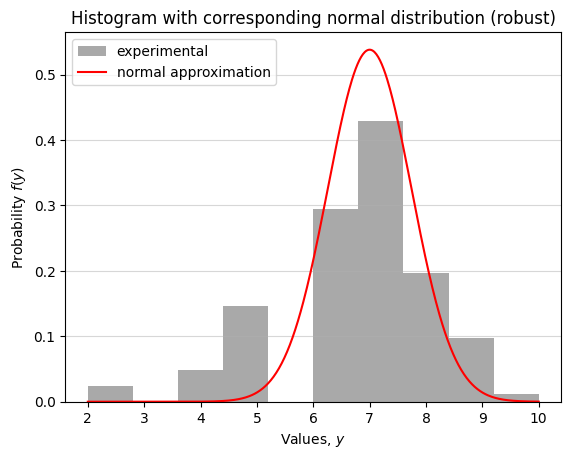

In [ ]:
# briefly summarize your findings
DS_Q_Q_Hist(sleep_df['Hours'], est='robust')

Estimation method: robust
n = 102, mu = 3, sigma = 1.483
Expected number of data outside CI: 5


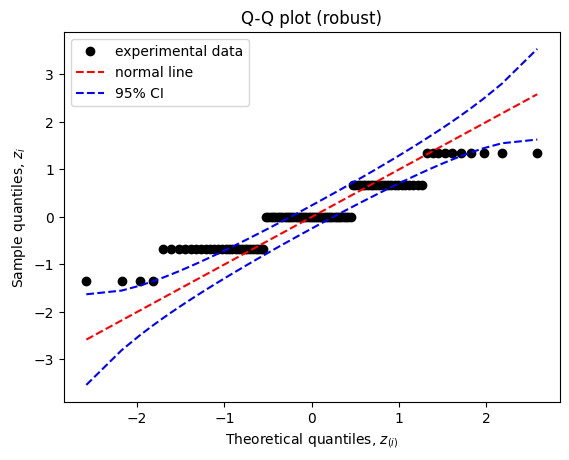

In [ ]:
DS_Q_Q_Plot(sleep_df['Tired'])

**Conclusion** 

Based on the Anderson Darling test and the histogram and QQ-plot, we can see that the data is not normally distributed. Anderson Darling test p > 0.05. The QQ plot nicely demonstrates that the datapoints are not within the blue 95% confidence interval envelope.

<a name='ex-32'></a>
### Check homogeneity of variance (20 pt)

<ul><li>
Use boxplots for the check of homoegeneity of variance. Do you want the full points? Plot with bokeh!</li>

<li>Use a Levene’s & Bartlett’s Test of Equality (Homogeneity) of Variance to test equal variance statistically</li><ul>

In [ ]:
import pandas as pd
from bokeh.models import ColumnDataSource, Whisker
from bokeh.plotting import figure, show
from bokeh.transform import factor_cmap
from bokeh.models import Range1d

df = sleep_df

breakfast = ['Yes', 'No']

# compute quantiles
qs = df.groupby("Breakfast").Hours.quantile([0.25, 0.5, 0.75])
qs = qs.unstack().reset_index()
qs.columns = ["Breakfast", "q1", "q2", "q3"]
df = pd.merge(df, qs, on="Breakfast", how="left")

# compute IQR outlier bounds
iqr = df.q3 - df.q1
df["upper"] = df.q3 + 1.5*iqr
df["lower"] = df.q1 - 1.5*iqr

source = ColumnDataSource(df)

p = figure(tools="",
           title="",
           background_fill_color="#eaefef", y_axis_label=" Hours of sleep", x_axis_label="Tireness score (0-5)")

# outlier range
whisker = Whisker(base="Breakfast", upper="upper", lower="lower", source=source)
whisker.upper_head.size = whisker.lower_head.size = 10
p.add_layout(whisker)

# quantile boxes
cmap = factor_cmap("Breakfast", "TolRainbow7", breakfast)
p.vbar("Breakfast", 0.7, "q2", "q3", source=source, color=cmap , line_color="black")
p.vbar("Breakfast", 0.7, "q1", "q2", source=source, color=cmap, line_color="black")

# outliers
outliers = df[~df.Hours.between(df.lower, df.upper)]
p.scatter("Breakfast", "Hours", source=outliers, size=7, color="black", alpha=0.3)

p.xgrid.grid_line_color = None
p.axis.major_label_text_font_size="14px"
p.axis.axis_label_text_font_size="12px"

p.y_range = Range1d(-2, 15)



show(p)

In [ ]:
import pandas as pd
from bokeh.models import ColumnDataSource, Whisker
from bokeh.plotting import figure, show
from bokeh.transform import factor_cmap
from bokeh.models import Range1d

df = sleep_df

tired = ['1','2','3','4','5']

# compute quantiles
qs = df.groupby("Tired").Hours.quantile([0.25, 0.5, 0.75])
qs = qs.unstack().reset_index()
qs.columns = ["Tired", "q1", "q2", "q3"]
df = pd.merge(df, qs, on="Tired", how="left")

# compute IQR outlier bounds
iqr = df.q3 - df.q1
df["upper"] = df.q3 + 1.5*iqr
df["lower"] = df.q1 - 1.5*iqr

source = ColumnDataSource(df)

p = figure(tools="", toolbar_location=None,
           title="",
           background_fill_color="#eaefef", y_axis_label=" Hours of sleep", x_axis_label="Tireness score (0-5)")

# outlier range
whisker = Whisker(base="Tired", upper="upper", lower="lower", source=source)
whisker.upper_head.size = whisker.lower_head.size = 10
p.add_layout(whisker)

# quantile boxes
cmap = factor_cmap("Tired", "TolRainbow7", tired)
p.vbar("Tired", 0.7, "q2", "q3", source=source, color=cmap , line_color="black")
p.vbar("Tired", 0.7, "q1", "q2", source=source, color=cmap, line_color="black")

# outliers
outliers = df[~df.Hours.between(df.lower, df.upper)]
p.scatter("Tired", "Hours", source=outliers, size=7, color="black", alpha=0.3)

p.xgrid.grid_line_color = None
p.axis.major_label_text_font_size="14px"
p.axis.axis_label_text_font_size="12px"

p.y_range = Range1d(-2, 15)



show(p)

In [ ]:
def DS_2sample_Levenetest_vars(y1, y2, center = 'median', alternative = 'two-sided', alpha = 0.05):
    """
    *
    Function DS_2sample_Levenetest_vars(y1, y2, center='median', alternative='two-sided', alpha=0.05)
     
       This function performs a 2-sample Levene-test (Null Hypothesis Significance Test)
       in the spirit of R, testing 2 variances without using a normal approximation. 
    
    Requires:          -
    
    Usage:             DS_2sample_Levenetest_vars(y1, y2, center = ['median']/'mean', 
                                         alternative=['two-sided']/'less'/'greater', alpha=0.05)
    
                         center = 'median' [default]          use z.ik = |y.ik - median(y.i)| (Brown-Forsythe)
                                  'mean'                      use z.ik = |y.ik - mean(y.i)|   (Levene)
                         alternative = 'two-sided' [default]  H1: sigma_1^2 != sigma_2^2
                                       'less'                 H1: sigma_1^2 < sigma_2^2
                                       'greater'              H1: sigma_1^2 > sigma_2^2
                         alpha:   significance level of test [default: 0.05]
     
    Return:            t, p-value, t.crit.L, t.crit.R  [ + print interpretable output to stdout ]
                       where t.crit.L and t.crit.R are the lower and upper critical values, 
                       t is the test statistic and p-value is the p-value of the test.    
     
    Author:            M.E.F. Apol
    Date:              2022-02-01, rev. 2022_08_26
    Validation:        2022-02-01 against scipy.statst.levene and https://www.socscistatistics.com/
    """
     
    from scipy.stats import t as t_dist
    import numpy as np
        
    n_1 = len(y1);               n_2 = len(y2)
    y_av_1  = np.mean(y1);    y_av_2 = np.mean(y2)
    y_med_1 = np.median(y1); y_med_2 = np.median(y2)
    s2_1 = np.var(y1, ddof=1);  s2_2 = np.var(y2, ddof=1) 
    
    print(80*'-')
    if center == 'median':
        print('Brown-Forsythe test for 2 variances:')
        print('     using the median of both datasets as center')
        y_c_1 = y_med_1; y_c_2 = y_med_2
    elif center == 'mean':
        print('Levene test for 2 variances:')
        print('     using the mean of both datasets as center')
        
        y_c_1 = y_av_1; y_c_2 = y_av_2
    else:
        print('Wrong center option...')
        print(80*'-' + '\n')
        t_samp, p_value, t_crit_L, t_crit_R = np.nan, np.nan, np.nan, np.nan
        return(t_samp, p_value, t_crit_L, t_crit_R)
    
    print('s2.1 = {:.3g}, s2.2 = {:.3g}, n.1 = {:d}, n.2 = {:d}, alpha = {:.3g}'.format(s2_1, s2_2, n_1, n_2, alpha))
    print('H0: sigma.1  = sigma.2')
    if alternative == 'two-sided':
        print('H1: sigma.1 != sigma.2')
    elif alternative == 'greater':
        print('H1: sigma.1  > sigma.2')
    elif alternative == 'less':
        print('H1: sigma.1  < sigma.2')
    else:
        print('Wrong alternative hypothesis chosen!')
        print(80*'-' + '\n')
        t_samp, p_value, t_crit_L, t_crit_R = np.nan, np.nan, np.nan, np.nan
        return(t_samp, p_value, t_crit_L, t_crit_R)
    
    z_1 = np.abs(y1 - y_c_1)
    z_2 = np.abs(y2 - y_c_2)
    z_av_1 = np.mean(z_1);        z_av_2 = np.mean(z_2)
    s2_z_1 = np.var(z_1, ddof=1); s2_z_2 = np.var(z_2, ddof=1)
    df = n_1 + n_2 - 2
    s2_pooled = ((n_1 - 1)*s2_z_1 + (n_2 - 1)*s2_z_2)/df
    t_samp = (z_av_1 - z_av_2) / np.sqrt(s2_pooled * (1/n_1 + 1/n_2))
    F = t_samp**2
    
    if alternative == 'two-sided':
        p_value = 2*(t_dist.cdf(-np.abs(t_samp), df))
        t_crit_L = t_dist.ppf(alpha/2, df)
        t_crit_R = t_dist.ppf(1-alpha/2, df)
    elif alternative == 'greater':
        p_value = 1-t_dist.cdf(t_samp, df)
        # better precision: use survival function
        p_value = t_dist.sf(t_samp, df)
        t_crit_L = float('-inf')
        t_crit_R = t_dist.ppf(1-alpha, df)
    elif alternative == 'less':
        p_value = t_dist.cdf(t_samp, df)
        t_crit_L = t_dist.ppf(alpha, df)
        t_crit_R = float('inf')
    print('t = {:.4g}, p-value = {:.4g}, t.crit.L = {:.4g}, t.crit.R = {:.4g}, F = {:.4g}'.format(t_samp, p_value, t_crit_L, t_crit_R, F))
    print(80*'-' + '\n')
    return(t_samp, p_value, t_crit_L, t_crit_R)    

In [ ]:
# your code for the statistical test here
DS_2sample_Levenetest_vars(sleep_df[sleep_df['Breakfast'] == True ]['Hours'], sleep_df[sleep_df['Breakfast'] == False]['Hours'])

--------------------------------------------------------------------------------
Brown-Forsythe test for 2 variances:
     using the median of both datasets as center
s2.1 = 1.61, s2.2 = 2.4, n.1 = 61, n.2 = 41, alpha = 0.05
H0: sigma.1  = sigma.2
H1: sigma.1 != sigma.2
t = -0.9849, p-value = 0.327, t.crit.L = -1.984, t.crit.R = 1.984, F = 0.9701
--------------------------------------------------------------------------------



(-0.9849392079146445,
 0.32703102168888487,
 -1.983971518449634,
 1.9839715184496334)

**Conclusion** 

In the Boxplots and in the levene test there is not a significant difference visible between Hours, grouped by breakfast and no breakfast. 2-sample Levene test p > 0.05.

---

<a name='3'></a>
## Part 4: Prepare your data (10 pt)

Create a dataframe with equal samplesize. Make three categories for tireness 1-2 = no, 3 = maybe, 4-5 = yes

In [ ]:
# to make an equal dataset I first checked what the exact numbers of data were and then concluded that there needed to be
# added 20 samples to the condition 'no breakfast' and casted to a list
sleep_df_extra = sleep_df[sleep_df["Breakfast"] == False]["Hours"].sample(n=20).tolist()
sleep_df2 = sleep_df
# Replace the three categories for tireness as described
sleep_df2['Tired'] = sleep_df["Tired"].replace([1,2,3,4,5],['no', 'no','maybe','yes','yes'])

# Also casted the other values to a list for further analysis
sleep_df_breakfast = sleep_df[sleep_df["Breakfast"] == True]["Hours"].tolist()
sleep_df_nobreakfast = sleep_df[sleep_df["Breakfast"] == False]["Hours"].tolist()

# appended the extra made data to the no breakfast condition
for i in sleep_df_extra:
    sleep_df_nobreakfast.append(i)

# I wanted to do oversampling for the other conditions with sklearn, but I unfortunately had not enough time to figure that out

/tmp/ipykernel_2405/1924181053.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sleep_df2['Tired'] = sleep_df["Tired"].replace([1,2,3,4,5],['no', 'no','maybe','yes','yes'])


---

<a name='4'></a>
## Part 5: Answer the research questions (20 pt)

<details>    
</ul>
</details>

In [ ]:
import scipy

# Performed a mann whitney u test, because the data is not normally distributed
# if statement for p value below 0.05 and else for above 0.05
if scipy.stats.mannwhitneyu(sleep_df2[sleep_df2['Breakfast'] == True ]['Hours'], sleep_df2[sleep_df2['Breakfast'] == False]['Hours'])[1] < 0.05:
    print(f"There is a significant difference between the two groups and the corresponding p value is: {scipy.stats.mannwhitneyu(sleep_df2[sleep_df2['Breakfast'] == True ]['Hours'], sleep_df2[sleep_df2['Breakfast'] == False]['Hours'])[1]}")
else:
    print(f"There is not a significant difference between the two groups and the corresponding p value is {scipy.stats.mannwhitneyu(sleep_df2[sleep_df2['Breakfast'] == True ]['Hours'], sleep_df2[sleep_df2['Breakfast'] == False]['Hours'])[1]}")
 

There is a significant difference between the two groups and the corresponding p value is: 0.019288382265917014


In [ ]:
sleep_list = sleep_df2.groupby(['Breakfast', 'Tired'])['Hours'].apply(list)


# Kruskal wallis test because the data is not normally distributed and >2 datasets
# if statement for p value below 0.05 and else for above 0.05
if scipy.stats.kruskal(*sleep_list)[1] < 0.05:
    print(f'There is a significant difference between the groups and the corresponding p value is{scipy.stats.kruskal(*sleep_list)[1]}')
else:
    print(f"There is no significant difference between the groups and the corresponding p value is {scipy.stats.kruskal(*sleep_list)[1]}")

There is no significant difference between the groups and the corresponding p value is 0.237304503507974


---